In [2]:
import pandas as pd
thickness = pd.read_csv("/content/Wells Net Thickness.csv")
thickness

,Unnamed: 0,thick_210,thick_220,thick_230,thick_240,thick_250,thick_260,thick_270,thick_280,x,y,gross_thickness
0,P01net_th,83.8200,83.8200,83.8200,83.8200,77.1010,74.7493,38.9704,35.2750,164,110,83.82
1,P02net_th,74.1500,74.1500,74.1500,73.7042,72.0696,72.0696,27.1933,3.2692,162,87,74.15
2,P03net_th,140.0700,140.0700,140.0700,136.9823,136.1402,135.8595,125.7542,5.6141,134,115,140.07
3,I03net_th,169.9600,169.9600,164.8510,163.4886,142.7120,98.0932,96.3901,7.1526,109,113,169.96
4,I01net_th,99.0200,99.0200,98.6231,97.6310,85.3278,84.7325,19.8437,0.3968,190,100,99.02
5,E06net_th,76.4900,76.4900,76.4900,76.4900,63.0007,43.6867,0.0000,0.0000,170,170,76.49
6,E05net_th,138.2200,138.2200,138.2200,138.2200,131.2952,65.0936,6.3709,0.0000,72,152,138.22
7,E03net_th,211.1800,211.1800,211.1800,204.4087,195.5214,78.7164,10.1570,0.0000,46,46,211.18
8,E02net_th,76.4045,76.4045,76.4045,74.8291,74.0415,65.8497,37.1783,0.0000,145,41,78.61


In [4]:
#!pip install pykrige
import pykrige as pk
import numpy as np
#define the grid
gridx = np.arange (25,225,5.0)
gridy=np.arange (25,200,5.0)

     |████████████████████████████████| 734 kB 8.9 MB/s 


In [5]:
print(gridx)
print(gridy)

[ 25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.
  95. 100. 105. 110. 115. 120. 125. 130. 135. 140. 145. 150. 155. 160.
 165. 170. 175. 180. 185. 190. 195. 200. 205. 210. 215. 220.]
[ 25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.
  95. 100. 105. 110. 115. 120. 125. 130. 135. 140. 145. 150. 155. 160.
 165. 170. 175. 180. 185. 190. 195.]


In [8]:
Gross_Thickness=pk.UniversalKriging(
    np.array(thickness['x']),
    np.array(thickness['y']),
    np.array(thickness['gross_thickness']),
    variogram_model="linear",
    drift_terms=["regional_linear"]

)

In [15]:
import matplotlib.pyplot as plt
#get output of the kriging process
z,ss = Gross_Thickness.execute("grid",gridx,gridy)
#meshing / make a grid to represent field data 
longrid,latgrid = np.meshgrid(gridx,gridy)  


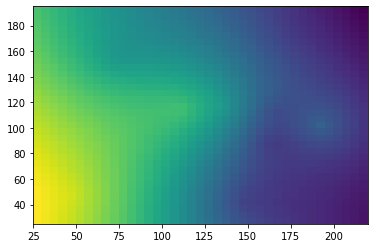

In [16]:
from mpl_toolkits import mplot3d
fig=plt.figure()
ax=plt.axes()
ax.pcolormesh(longrid,latgrid,np.array(z))
plt.show()